# Basic Relationships between different baseball statistics

This notebook does several things:

1. Plot correlations between different baseball statistics, as well as the R$^2$ value (a measure of the correlation).
2. Plot the corelations of different statistics, color-coded by the cluster they are assigned to.
3. Plot the individual clusters (useful for understanding the intrinsic shape of clusters)
4. Plot the central values of individual clusters on top of the distribution of statistics.

In [1]:
# standard imports
import numpy as np
import os

# plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# data management
import pandas as pd

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2

# basic stats usage
from scipy import stats
import scipy

# custom scrapers
import hittingpredictor as hp
import pitchingpredictor as pp

In [2]:
# make the PR20 default plotting style.

import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt

fpath = os.path.join(rcParams["datapath"], '/Users/mpetersen/Downloads/Roboto_Condensed/RobotoCondensed-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['font.weight'] = 'medium'







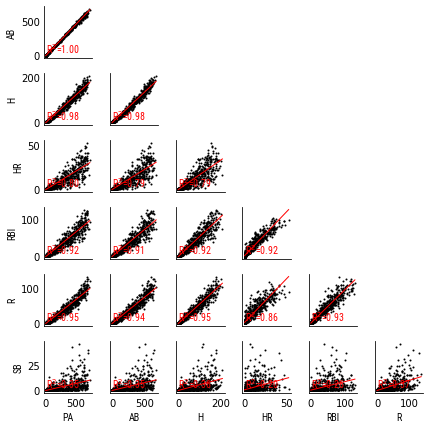

In [3]:

df = hp.scrape_year(year=2019,cat='bat',verbose=0)

categories = ['PA','AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7, fontproperties=prop)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i], fontproperties=prop)
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j], fontproperties=prop)
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
fig.tight_layout()

plt.savefig('figures/battingcorrelations_nocolor.png')



In [4]:
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.bottom'] = True


# which years are we interested in querying?
years = range(2019-3, 2019+1)


year_dfs = []

for year in years:
    print(year)

    df = hp.scrape_year(year=year,cat='bat',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    






2016
2017
2018
2019


In [5]:
nclusters = 12

year_df,df,stereotype_df,hitter_cluster_centroid_df,transform = hp.compute_cluster(all_year_data,years,nclusters,min_pas=150,verbose=0)




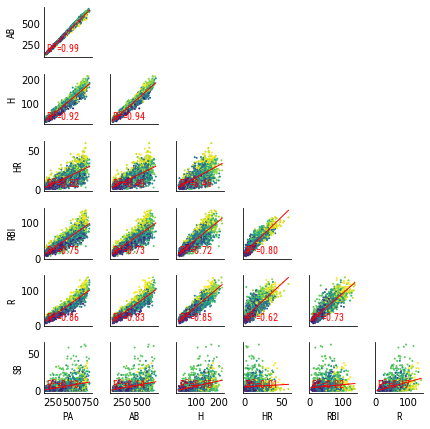

In [6]:
categories = ['PA','AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx,cleany,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7, fontproperties=prop)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i], fontproperties=prop)
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j], fontproperties=prop)
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/battingcorrelations.png')



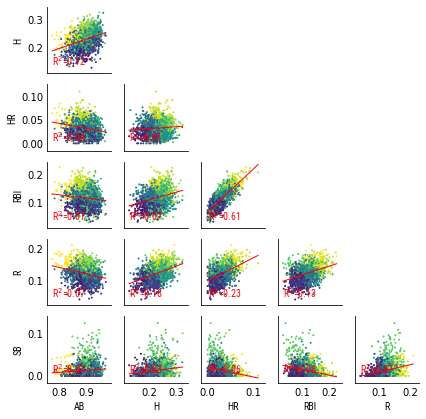

In [7]:
# do the same set of correlations normalized by PAs

categories = ['AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    cleann = np.array(df['PA']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx/cleann,cleany/cleann,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((cleanx/cleann)[w],(cleany/cleann)[w])
    
    xvals = np.linspace(np.nanmin((cleanx/cleann)[w]),np.nanmax((cleanx/cleann)[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin((cleanx/cleann)[w]),np.nanmin((cleany/cleann)[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7, fontproperties=prop)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i], fontproperties=prop)
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j], fontproperties=prop)
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/battingcorrelations_normalized.png')

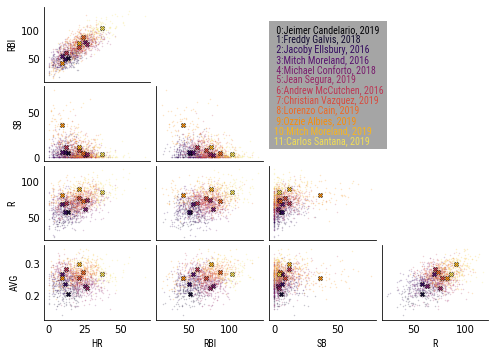

In [8]:
# do the same set of correlations normalized by PAs

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.bottom'] = True



categories = ['AB','H','HR','RBI','R','SB']
categories = ['HR','RBI','SB','R','H']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


    
fig = plt.figure(figsize=(7,5))

for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        for clusternum in range(1,12): 

            if categories[i] == 'H':
                cleanx = (np.array(df[categories[i]]).astype('float'))/np.array(df['AB']).astype('float')
            else:
                cleanx = np.array(df[categories[i]]).astype('float')

            if categories[j] == 'H':
                cleany = (np.array(df[categories[j]]).astype('float'))/np.array(df['AB']).astype('float')
            else:
                cleany = np.array(df[categories[j]]).astype('float')

            #if clusternum==1:

            cleanz = np.array(df['Value Cluster']).astype('float')
            cleann = np.array(df['PA']).astype('float')
            w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

            if categories[i]=='H':
                    ax.scatter((cleanx)[w],600.*(cleany/cleann)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.25)
            elif categories[j]=='H':
                    ax.scatter(600.*(cleanx/cleann)[w],(cleany)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.25)
            else:
                    ax.scatter(600.*(cleanx/cleann)[w],600.*(cleany/cleann)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.25)

            try:
                if categories[i]=='H':
                    xval = (np.abs(hitter_cluster_centroid_df[categories[i]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))+\
                           np.abs(hitter_cluster_centroid_df['HR.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float')))/\
                    np.abs(hitter_cluster_centroid_df['AB.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                else:
                    xval = 6.*np.abs(hitter_cluster_centroid_df[categories[i]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))

                if categories[j]=='H':
                    yval = (np.abs(hitter_cluster_centroid_df[categories[j]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))+\
                           np.abs(hitter_cluster_centroid_df['HR.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float')))/\
                    np.abs(hitter_cluster_centroid_df['AB.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                else:
                    yval = 6.*np.abs(hitter_cluster_centroid_df[categories[j]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                #print(xval,yval)
                #ax.scatter(xval/100.,yval/100.,color=cm.viridis(clusternum/12.,1.),marker='x',s=10.)
                
                ax.scatter(xval,yval,color=cm.inferno(clusternum/12.,1.),marker='X',s=20.,edgecolors='black',zorder=100,linewidths=0.4)
            except:
                #print(categories[i],categories[j])
                pass


            if j==ncategories-1: 
                if categories[i]=='H':
                    ax.set_xlabel('AVG', fontproperties=prop)
                else:
                    ax.set_xlabel(categories[i], fontproperties=prop)
            else:
                ax.set_xticklabels(())

            if i==0: 
                if categories[j]=='H':
                    ax.set_ylabel('AVG', fontproperties=prop)
                else:
                    
                    ax.set_ylabel(categories[j], fontproperties=prop)
            else:
                ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


fig.tight_layout()

plt.subplots_adjust(hspace=0.06,wspace=0.06,right=1.20,top=1.20)


mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.bottom'] = False


ax = fig.add_axes([0.54,0.585,0.235,0.355])
ax.set_zorder(1)
ax.patch.set_alpha(0.35)
ax.patch.set_color('black')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)



for k in range(0,12):
    
    plt.text(  # position text relative to Figure
    0.55, 0.93-(0.028*k), '{0:2d}:{1}, {2:4.0f}'.format(k,\
                                                       np.array(stereotype_df['Name'][stereotype_df['Value Cluster']==k+1])[0],\
                                                       np.array(stereotype_df['Year'][stereotype_df['Value Cluster']==k+1])[0]),
    ha='left', va='top',
    transform=fig.transFigure,color=cm.inferno(k/12.,1.), fontproperties=prop
)


plt.savefig('figures/battingcorrelations_normalized_centers.png'.format(clusternum),dpi=500)
    



### 

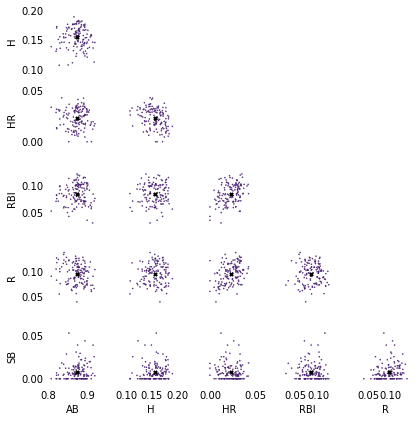

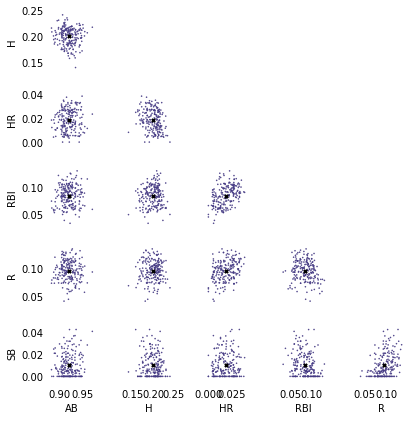

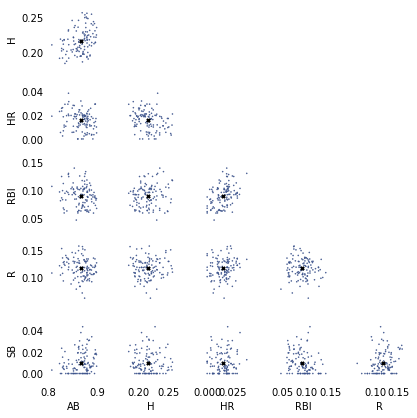

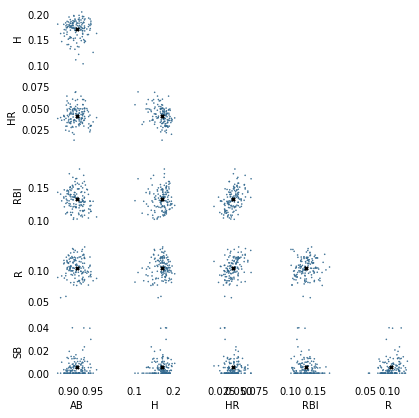

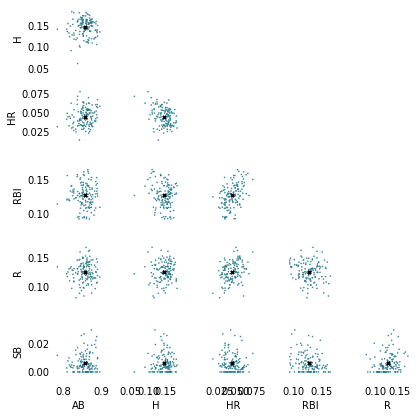

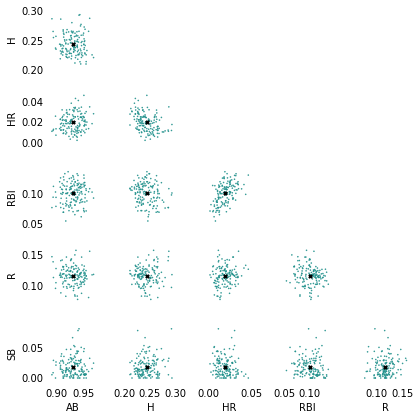

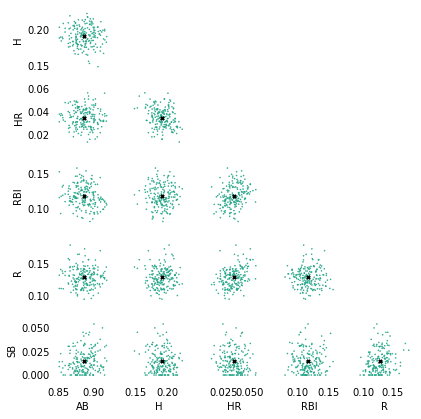

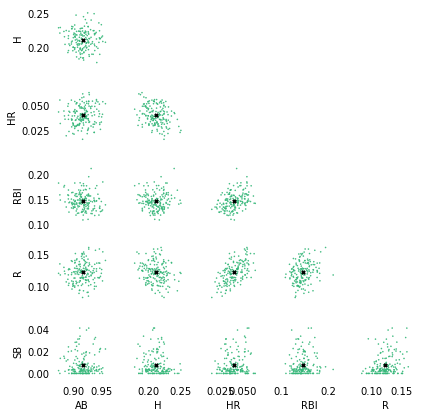

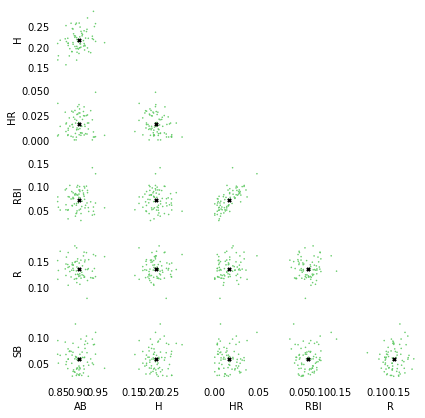

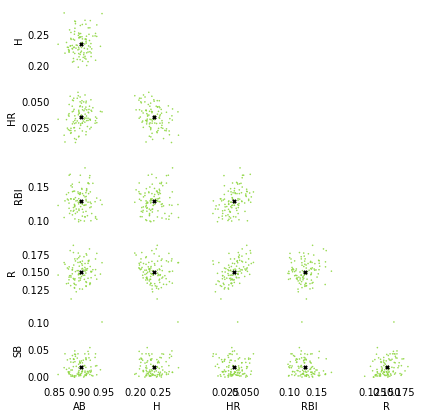

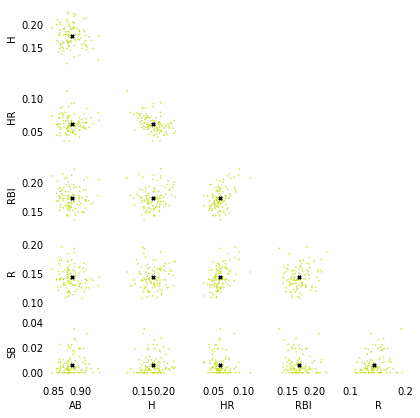

In [9]:
# do the same set of correlations normalized by PAs

categories = ['AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


for clusternum in range(1,12): 
    
    fig = plt.figure(figsize=(7,7))

    for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        if categories[i] == 'H':
            cleanx = np.array(df[categories[i]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleanx = np.array(df[categories[i]]).astype('float')

        if categories[j] == 'H':
            cleany = np.array(df[categories[j]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleany = np.array(df[categories[j]]).astype('float')

        cleanz = np.array(df['Value Cluster']).astype('float')
        cleann = np.array(df['PA']).astype('float')
        w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

        ax.scatter((cleanx/cleann)[w],(cleany/cleann)[w],color=cm.viridis(cleanz[w]/12.,1.),s=0.3)

        try:
            xval = np.abs(hitter_cluster_centroid_df[categories[i]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            yval = np.abs(hitter_cluster_centroid_df[categories[j]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            #print(xval,yval)
            ax.scatter(xval/100.,yval/100.,color='black',marker='x',s=10.)
        except:
            pass
            #print(categories[i],categories[j])
            
            
        if j==ncategories-1: 
            ax.set_xlabel(categories[i])
        else:
            ax.set_xticklabels(())

        if i==0: 
            ax.set_ylabel(categories[j])
        else:
            ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


    fig.tight_layout()

    plt.savefig('figures/battingcorrelations_normalized{}.png'.format(clusternum))
    


## Part 2: Pitching Correlations

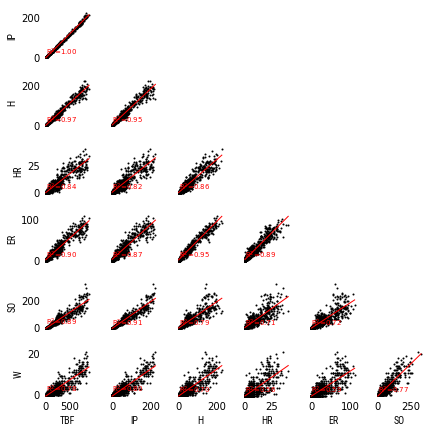

In [10]:
df = pp.scrape_year(year=2019,cat='pit',verbose=0)

categories = ['TBF','IP','H','HR','ER','SO','W']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i], fontproperties=prop)
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j], fontproperties=prop)
    else:
        ax.set_yticklabels(())
        
        
fig.tight_layout()

plt.savefig('figures/pitchingcorrelations_nocolor.png')




In [11]:

# which years are we interested in querying?
years = range(2019-3, 2019+1)


year_dfs = []

for year in years:
    print(year)

    df = pp.scrape_year(year=year,cat='pit',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    




nclusters = 11

year_df,df,stereotype_df,pitching_cluster_centroid_df,transform = pp.compute_cluster_pitching(all_year_data,years,nclusters,min_ip=10,verbose=0)




2016
2017
2018
2019


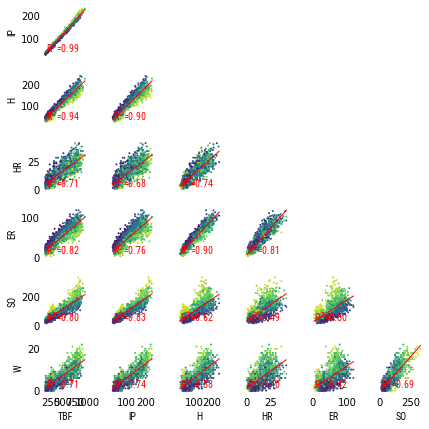

In [12]:
categories = ['TBF','IP','H','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx,cleany,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7, fontproperties=prop)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i], fontproperties=prop)
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j], fontproperties=prop)
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/pitchingcorrelations.png')



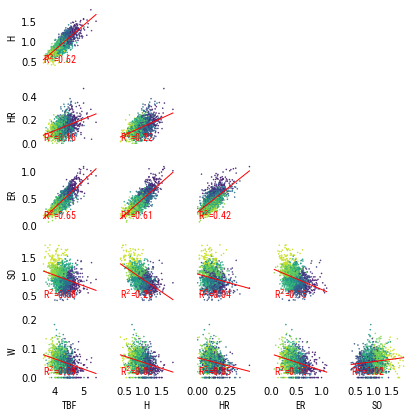

In [13]:
categories = ['TBF','H','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    cleann = np.array(df['IP']).astype('float')
    w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann))
    
    ax.scatter(cleanx/cleann,cleany/cleann,color=cm.viridis(cleanz/12.,1.),s=0.3)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((cleanx/cleann)[w],(cleany/cleann)[w])
    
    xvals = np.linspace(np.nanmin((cleanx/cleann)[w]),np.nanmax((cleanx/cleann)[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin((cleanx/cleann)[w]),np.nanmin((cleany/cleann)[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7, fontproperties=prop)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i], fontproperties=prop)
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j], fontproperties=prop)
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/pitchingcorrelations_normalized.png')

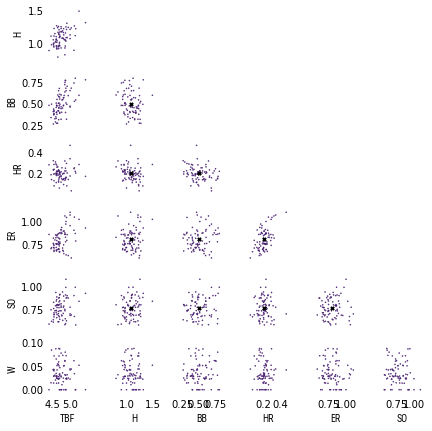

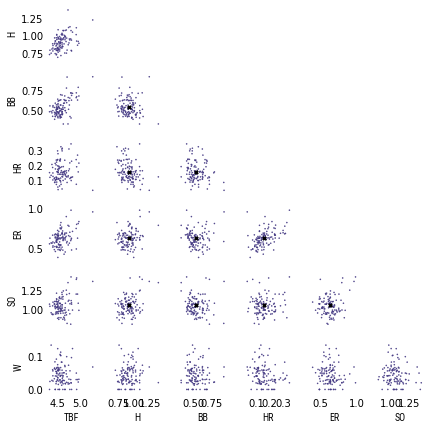

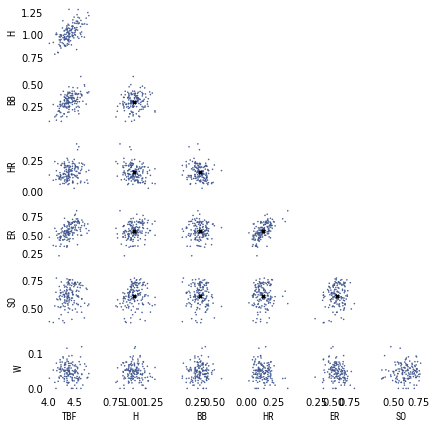

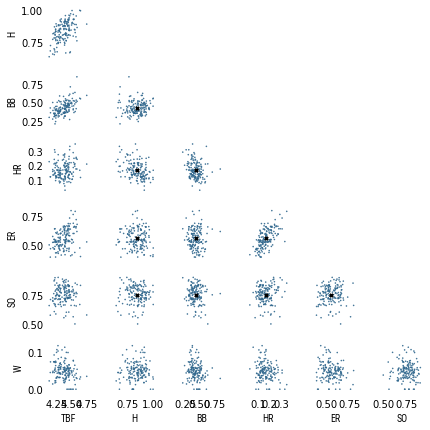

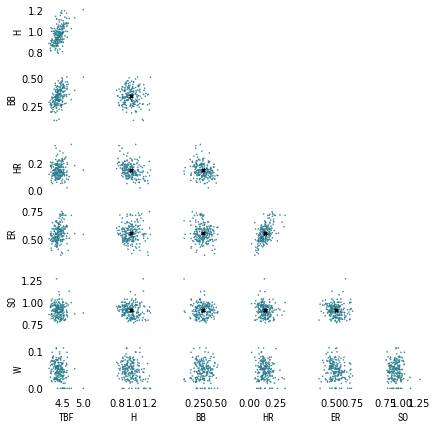

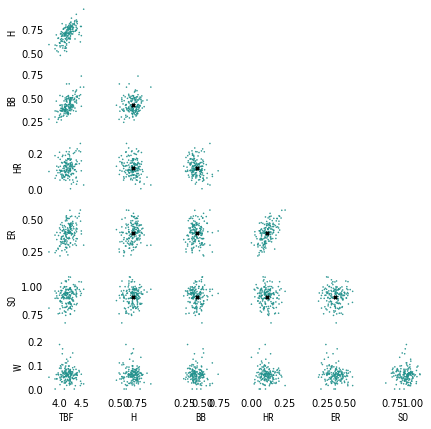

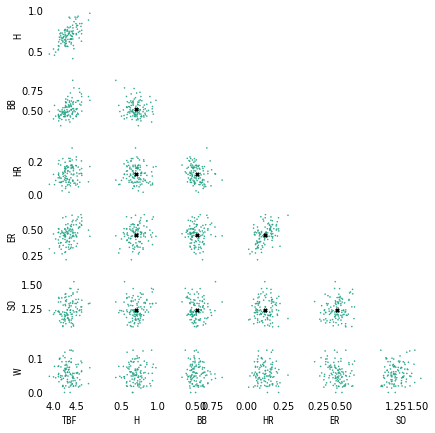

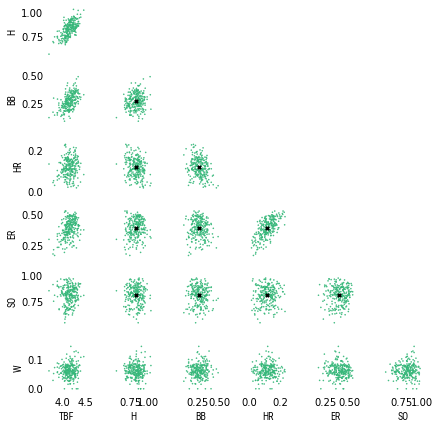

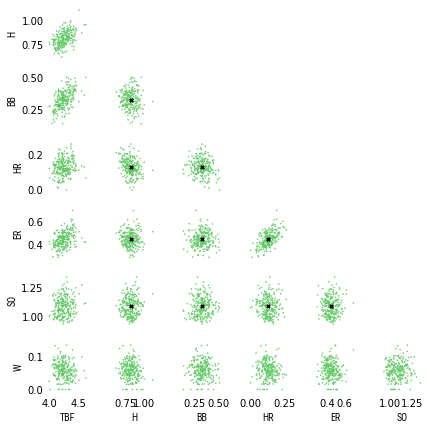

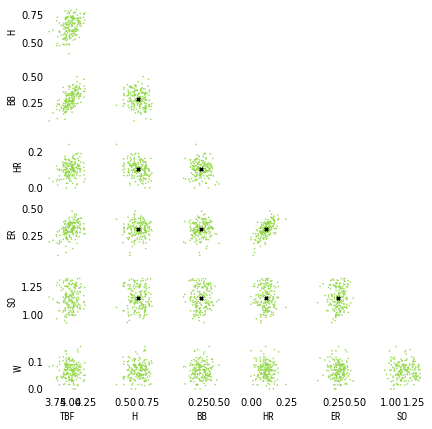

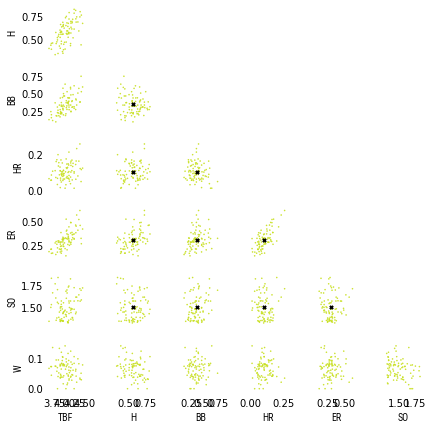

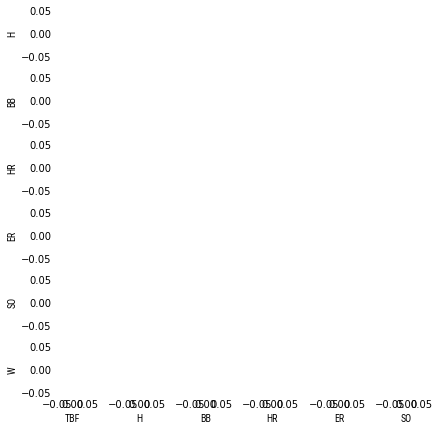

In [14]:
categories = ['TBF','H','BB','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)

for clusternum in range(1,13):

    fig = plt.figure(figsize=(7,7))

    for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        if categories[i] == 'H':
            cleanx = np.array(df[categories[i]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleanx = np.array(df[categories[i]]).astype('float')

        if categories[j] == 'H':
            cleany = np.array(df[categories[j]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleany = np.array(df[categories[j]]).astype('float')

        cleanz = np.array(df['Value Cluster']).astype('float')
        cleann = np.ones(cleanx.size)#np.array(df['IP']).astype('float')
        cleann = np.array(df['IP']).astype('float')
        w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

        ax.scatter((cleanx/cleann)[w],(cleany/cleann)[w],color=cm.viridis(cleanz[w]/12.,1.),s=0.3)

        try:
            xval = np.abs(pitching_cluster_centroid_df[categories[i]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            yval = np.abs(pitching_cluster_centroid_df[categories[j]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            #print(xval,yval)
            ax.scatter(xval/100.,yval/100.,color='black',marker='x',s=10.)
        except:
            pass
            #print(categories[i],categories[j])

        if j==ncategories-1: 
            ax.set_xlabel(categories[i], fontproperties=prop)
        else:
            ax.set_xticklabels(())

        if i==0: 
            ax.set_ylabel(categories[j], fontproperties=prop)
        else:
            ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


    fig.tight_layout()

    plt.savefig('figures/pitchingcorrelations_cluster{}.png'.format(clusternum))

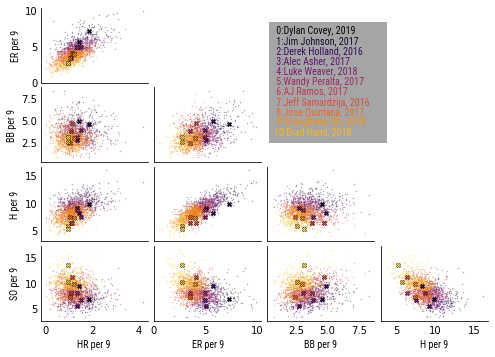

In [15]:
# do the same set of correlations normalized by PAs

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.bottom'] = True




categories = ['TBF','H','BB','HR','ER','SO','W']
categories = ['HR', 'ER', 'BB', 'H', 'SO']

# want: K/9
# ERA
# HR/9
# H/9
# BB/9



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


    
fig = plt.figure(figsize=(7,5))

for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        for clusternum in range(1,13): 

            cleanx = np.array(df[categories[i]]).astype('float')
            cleany = np.array(df[categories[j]]).astype('float')

            cleanz = np.array(df['Value Cluster']).astype('float')
            cleann = np.array(df['IP']).astype('float')
            w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

            ax.scatter(9*(cleanx/cleann)[w],9*(cleany/cleann)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.4)

            try:
                xval = 0.09*np.abs(pitching_cluster_centroid_df[categories[i]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))

                yval = 0.09*np.abs(pitching_cluster_centroid_df[categories[j]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                #print(xval,yval)
                #ax.scatter(xval/100.,yval/100.,color=cm.viridis(clusternum/12.,1.),marker='x',s=10.)
                
                ax.scatter(xval,yval,facecolor=cm.inferno(clusternum/12.,1.),marker='X',s=20.,edgecolors='black',zorder=100,linewidths=0.4)
            except:
                #print(categories[i],categories[j])
                pass


            if j==ncategories-1: 
                ax.set_xlabel(categories[i]+' per 9', fontproperties=prop)
            else:
                ax.set_xticklabels(())

            if i==0:
                ax.set_ylabel(categories[j]+' per 9', fontproperties=prop)
            
            else:
                ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


fig.tight_layout()

plt.subplots_adjust(hspace=0.06,wspace=0.06,right=1.20,top=1.20)

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.bottom'] = False



ax = fig.add_axes([0.54,0.605,0.235,0.335])
ax.set_zorder(1)
ax.patch.set_alpha(0.35)
ax.patch.set_color('black')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

for k in range(0,11):
    
    plt.text(  # position text relative to Figure
    0.55, 0.93-(0.028*k), '{0:2d}:{1}, {2:4.0f}'.format(k,\
                                                       np.array(stereotype_df['Name'][stereotype_df['Value Cluster']==k+1])[0],\
                                                       np.array(stereotype_df['Year'][stereotype_df['Value Cluster']==k+1])[0]),
    ha='left', va='top',
    transform=fig.transFigure,color=cm.inferno(k/12.,1.), fontproperties=prop
)




plt.savefig('figures/pitchingcorrelations_normalized_centers.png'.format(clusternum),dpi=500)
    


